<a href="https://colab.research.google.com/github/urvashi2004/ML_MiniProjects/blob/main/DeepLearning/Placement/PlacementUsingSLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd
from google.colab import files
import io

# Upload the file
uploaded = files.upload()

# Load the file into a DataFrame
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Select the last 3 columns
db = df.iloc[:, -3:]

# Display the selected data
print("Selected Data (last 3 columns):")
print(db)

Saving placement-dataset.csv to placement-dataset (9).csv
Selected Data (last 3 columns):
    cgpa     iq  placement
0    6.8  123.0          1
1    5.9  106.0          0
2    5.3  121.0          0
3    7.4  132.0          1
4    5.8  142.0          0
..   ...    ...        ...
95   4.3  200.0          0
96   4.4   42.0          0
97   6.7  182.0          1
98   6.3  103.0          1
99   6.2  113.0          1

[100 rows x 3 columns]


In [89]:
data_types = db.dtypes
print(data_types)

missingvalues = db.isnull()
for col in missingvalues:
    true_values = missingvalues[missingvalues[col]]
    if not true_values.empty:
        print(f'Missing values in column {col}:')
        print(true_values)
        print()
    else:
        print("No missing values")

duplicates = db[db.duplicated()]
print("Duplicate values in database\n", duplicates)

cgpa         float64
iq           float64
placement      int64
dtype: object
No missing values
No missing values
No missing values
Duplicate values in database
 Empty DataFrame
Columns: [cgpa, iq, placement]
Index: []


In [90]:
db['cgpa'].fillna(0, inplace=True)
db['iq'].fillna(0, inplace=True)

print("Updated DataFrame:\n", db)

Updated DataFrame:
     cgpa     iq  placement
0    6.8  123.0          1
1    5.9  106.0          0
2    5.3  121.0          0
3    7.4  132.0          1
4    5.8  142.0          0
..   ...    ...        ...
95   4.3  200.0          0
96   4.4   42.0          0
97   6.7  182.0          1
98   6.3  103.0          1
99   6.2  113.0          1

[100 rows x 3 columns]


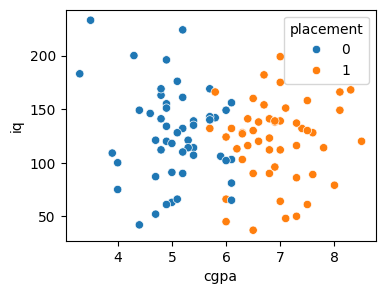

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(4,3))
sns.scatterplot(x="cgpa", y="iq", data=df, hue="placement")
plt.show()

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

x = db.iloc[:,:-1]
y = db["placement"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

pr = Perceptron()
pr.fit(x_train, y_train)

# model is overfitting
print("Accuracy training : ", pr.score(x_train, y_train)*100)
print("Accuracy testing : ", pr.score(x_test, y_test)*100)

Accuracy training :  42.5
Accuracy testing :  80.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


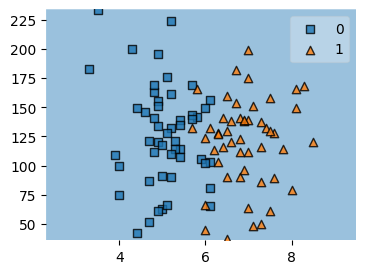

In [99]:
plt.figure(figsize=(4,3))
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=pr)
plt.show()